## Outliers and its Impact on Machine Learning!!

#### Which ML Models are sensitive to Outliers?
1. naive Bayes Classifier--- Not Sensitive to Outliers
2. SVM------------- Not Senesitive to Outliers
3. Linear Regression------- Sensitive to Outliers
4. Logistic Regression-------- Sensitive to Outliers
5. Decision tree Regressor or Classifier------- Not Sensitive to Outliers
6. Ensemble(RF, XGBoost, GB)--------- Not Sensitive to Outliers
7. K Nearest Neighbor------------ Not Sensitive to Outliers
8. KMeans--------- Sensitive to Outliers
9. Hirerarichal----------- Sensitive to Outliers
10. PCA--------- Sensitive to Outliers
11. Neural Networks---------- Sensitive to Outliers

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df['Age'].isnull().sum()

177

In [4]:
import seaborn as sns

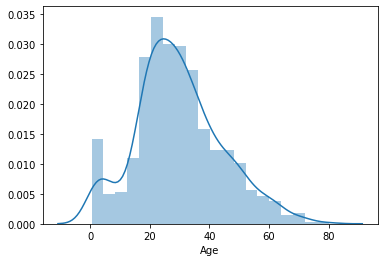

In [5]:
sns.distplot(df['Age'].dropna())

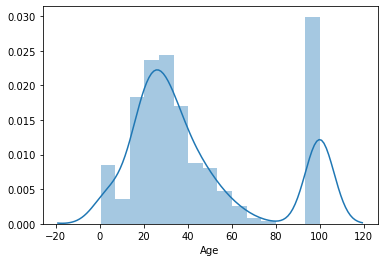

In [6]:
sns.distplot(df['Age'].fillna(100))

In [7]:
##extreme value analysis and IQR -- read about it

In [ ]:
### Gaussian Distribution

Text(0, 0.5, 'No of Passnagers')

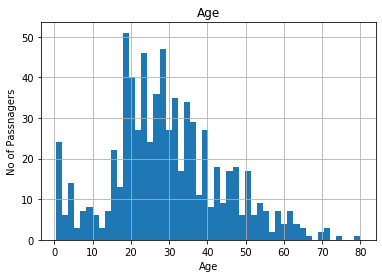

In [8]:
figure=df.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of Passnagers')

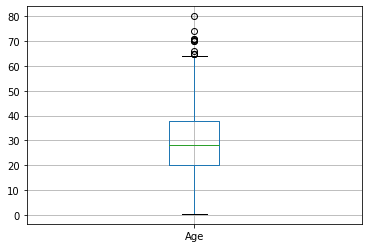

In [9]:
figure=df.boxplot(column='Age')

In [10]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [12]:
#### Assuming age follows a Gaussian distribution we will calculate the boundaries which differentiate the Outliers

upperBoundary=df['Age'].mean() + 3*df['Age'].std()
lowerBoundary=df['Age'].mean() - 3*df['Age'].std()
print(lowerBoundary), print(upperBoundary), print(df['Age'].mean())

-13.88037434994331
73.27860964406095
29.69911764705882


(None, None, None)

#### Features Is Skewed

Text(0, 0.5, 'No of Passnagers')

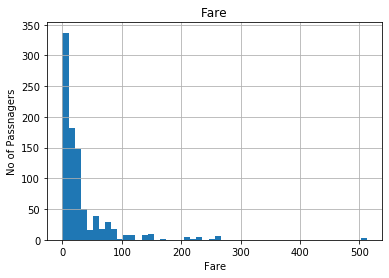

In [17]:
figure=df.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of Passnagers')

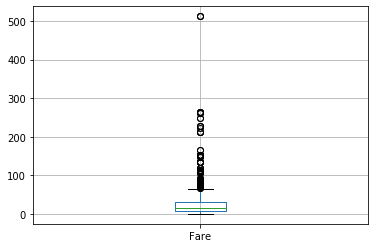

In [19]:
df.boxplot(column='Fare')

In [20]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [21]:
IQR = df.Fare.quantile(0.75)-df.Fare.quantile(0.25)

In [23]:
lower_bridge = df['Fare'].quantile(0.25)-(IQR*1.5)
upper_bridge = df['Fare'].quantile(0.75)+(IQR*1.5)
print(lower_bridge)
print(upper_bridge)

-26.724
65.6344


In [24]:
## Extreme Outliers------ Consider this
lower_bridge = df['Fare'].quantile(0.25)-(IQR*3)
upper_bridge = df['Fare'].quantile(0.75)+(IQR*3)
print(lower_bridge)
print(upper_bridge)

-61.358399999999996
100.2688


In [25]:
data = df.copy()

In [26]:
data.loc[data['Age']=>73, 'Age']=73

In [27]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
data.loc[data['Fare']>=100, 'Fare']=100

In [29]:
data.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Text(0, 0.5, 'No of Passnagers')

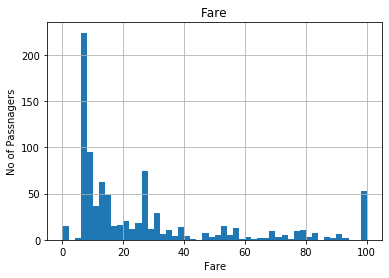

In [30]:
figure=data.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of Passnagers')

Text(0, 0.5, 'No of Passnagers')

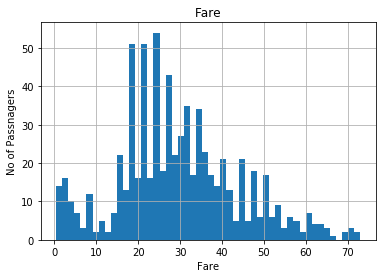

In [31]:
figure=data.Age.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of Passnagers')

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[['Age', 'Fare']].fillna(0), data['Survived'], test_size=0.3 )

In [38]:
###Logistic regression
from sklearn.linear_model import LogisticRegression
Classifier=LogisticRegression()
Classifier.fit(X_train, y_train)
y_pred=Classifier.predict(X_test)
y_pred1=Classifier.predict_proba(X_test)

from sklearn.metrics import accuracy_score, roc_auc_score
print('Accuracy Score: {}'.format(accuracy_score(y_test, y_pred)))
print('ROC_AUC_Socre: {}'.format(roc_auc_score(y_test, y_pred1[:,1])))


Accuracy Score: 0.6529850746268657
ROC_AUC_Socre: 0.6745659722222221


In [39]:
from sklearn.ensemble import RandomForestClassifier
Classifier=RandomForestClassifier()
Classifier.fit(X_train, y_train)
y_pred=Classifier.predict(X_test)
y_pred1=Classifier.predict_proba(X_test)

from sklearn.metrics import accuracy_score, roc_auc_score
print('Accuracy Score: {}'.format(accuracy_score(y_test, y_pred)))
print('ROC_AUC_Socre: {}'.format(roc_auc_score(y_test, y_pred1[:,1])))

Accuracy Score: 0.6604477611940298
ROC_AUC_Socre: 0.7220486111111112
